In [5]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [6]:
file_path = "Resources/MUP_IHP_RY22_P02_V10_DY20_PrvSvc.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head(3)

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE COM...,51,166625.86275,37033.313725,33908.45098
1,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,105888.12500,26208.687500,22531.25000
2,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...,30,182686.36667,29491.533333,27775.50000


In [7]:
df.columns

Index(['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_St',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs',
       'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt'],
      dtype='object')

In [8]:
df.isna().sum()

Rndrng_Prvdr_CCN             0
Rndrng_Prvdr_Org_Name        0
Rndrng_Prvdr_St              0
Rndrng_Prvdr_City            0
Rndrng_Prvdr_State_Abrvtn    0
Rndrng_Prvdr_State_FIPS      0
Rndrng_Prvdr_Zip5            0
Rndrng_Prvdr_RUCA            0
Rndrng_Prvdr_RUCA_Desc       0
DRG_Cd                       0
DRG_Desc                     0
Tot_Dschrgs                  0
Avg_Submtd_Cvrd_Chrg         0
Avg_Tot_Pymt_Amt             0
Avg_Mdcr_Pymt_Amt            0
dtype: int64

In [9]:
# Convert DRG descriptions to lowercase for more accurate keyword matching
df['DRG_Desc'] = df['DRG_Desc'].str.lower()

# Filter the DataFrame to include rows with the keywords "diabetes" or "hypertension" in the DRG description
diabetes_hypertension_df = df[df['DRG_Desc'].str.contains("diabetes|hypertension")]

# Reset the index of the new DataFrame
diabetes_hypertension_df.reset_index(drop=True, inplace=True)
diabetes_hypertension_df.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,305,hypertension without mcc,23,15539.434783,5363.739130,4062.652174
1,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,637,diabetes w mcc,37,25173.486486,9273.864865,8247.189189
2,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,638,diabetes with cc,21,16428.095238,6059.142857,5114.714286
3,10005,Marshall Medical Centers South Campus,2505 U S Highway 431 North,Boaz,AL,1,35957,4.0,Micropolitan area core: primary flow within an...,638,diabetes with cc,15,14451.866667,6283.866667,4723.666667
4,10005,Marshall Medical Centers South Campus,2505 U S Highway 431 North,Boaz,AL,1,35957,4.0,Micropolitan area core: primary flow within an...,639,diabetes w/o cc/mcc,11,6403.636364,4408.727273,3091.181818


In [10]:
summary_stats = diabetes_hypertension_df[['Tot_Dschrgs','Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt']].describe()
summary_stats

,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
count,3971.000000,3971.000000,3971.000000,3971.000000
mean,22.237220,38731.230872,8861.533618,7135.205130
std,12.845061,24248.979515,4499.218469,4174.127938
min,11.000000,6403.636364,3958.950000,2232.500000
25%,14.000000,22342.738095,6341.913044,4808.358333
50%,18.000000,32503.277778,7946.086957,6319.933333
75%,26.000000,47987.735104,10204.874686,8463.134680
max,222.000000,256981.652170,123303.666670,119767.750000


In [11]:
drg_summary = diabetes_hypertension_df.groupby('DRG_Desc')[['Tot_Dschrgs','Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt']].agg(['sum', 'mean'])
drg_summary

Tot_Dschrgs            Avg_Submtd_Cvrd_Chrg  \
                                 sum       mean                  sum   
DRG_Desc                                                               
diabetes w mcc                 25872  21.814503         6.097199e+07   
diabetes w/o cc/mcc              613  14.595238         9.411021e+05   
diabetes with cc               37711  24.503574         4.986537e+07   
hypertension w mcc              7392  18.251852         1.729944e+07   
hypertension without mcc       16716  20.921151         2.472381e+07   

                                       Avg_Tot_Pymt_Amt                \
                                  mean              sum          mean   
DRG_Desc                                                                
diabetes w mcc            51409.771211     1.392630e+07  11742.241133   
diabetes w/o cc/mcc       22407.193366     2.416454e+05   5753.460762   
diabetes with cc          32401.152066     1.209186e+07   7856.956487   
hypertension w mcc        42714.666748     3.898639e+06   9626.267946   
hypertension without mcc  30943.446748     5.030712e+06   6296.260464   

                         Avg_Mdcr_Pymt_Amt               
                                       sum         mean  
DRG_Desc                                                 
diabetes w mcc                1.171234e+07  9875.497829  
diabetes w/o cc/mcc           1.687025e+05  4016.726010  
diabetes with cc              9.524259e+06  6188.602516  
hypertension w mcc            3.226658e+06  7967.057449  
hypertension without mcc      3.701939e+06  4633.215413

In [12]:
drg_desc_list = diabetes_hypertension_df['DRG_Desc'].unique().tolist()

for i, drg_desc in enumerate(drg_desc_list, 1):
    print(f"{i}. {drg_desc}")

1. hypertension without mcc
2. diabetes w mcc
3. diabetes with cc
4. diabetes w/o cc/mcc
5. hypertension w mcc


1. hyptertension without mcc: [I10.9] without major complication or comorbidity
2. diabetes with mcc: [E11.65 or E10.65] a) type2 diabetes with hyperglycemia b) type1 diabetes with hyperglycemia, both with major complication or   comoborbidity
3. diabetes with cc: [E11.65 or E10.65] a) type2 diabetes with hyperglycemia b) type1 diabetes with hyperglycemia, both with complication or   comoborbidity
4. hyptertension with mcc: [I10.9] with major complication or comorbidity

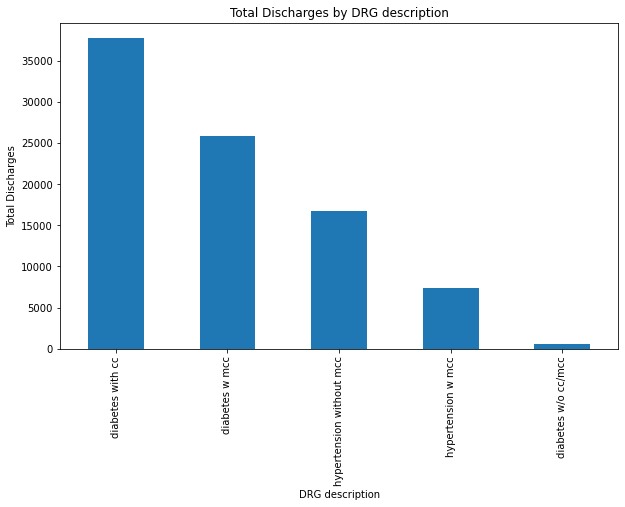

In [13]:
drg_total_discharges = diabetes_hypertension_df.groupby('DRG_Desc')['Tot_Dschrgs'].sum().sort_values(ascending = False)

plt.figure(figsize = (10,6))
drg_total_discharges.plot(kind='bar')
plt.title('Total Discharges by DRG description')
plt.xlabel('DRG description')
plt.ylabel('Total Discharges')
plt.show()

#### Investigating relationship between variables

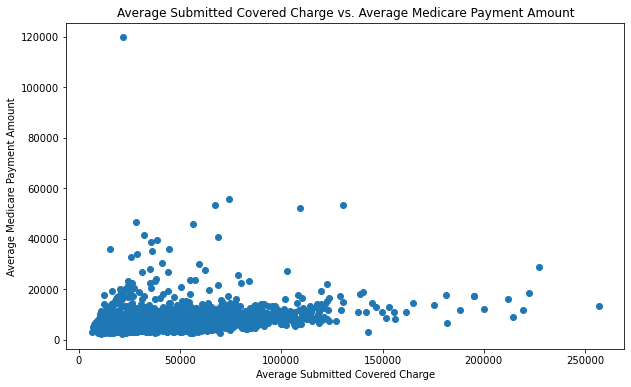

Correlation coefficient: 0.3015363561623917


In [14]:
#Avg_Submtd_Cvrd_Chrg vs Avg_Mdcr_Pymt_Amt
plt.figure(figsize =(10,6))

plt.scatter(diabetes_hypertension_df['Avg_Submtd_Cvrd_Chrg'], diabetes_hypertension_df['Avg_Mdcr_Pymt_Amt'])
plt.title('Average Submitted Covered Charge vs. Average Medicare Payment Amount')
plt.xlabel('Average Submitted Covered Charge')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

corr_coeff = diabetes_hypertension_df['Avg_Submtd_Cvrd_Chrg'].corr(diabetes_hypertension_df['Avg_Mdcr_Pymt_Amt'])
print(f'Correlation coefficient: {corr_coeff}')

This correlation coefficent indicates a weak positive relationship between Average Submitted Covered Charge and Average Medicare Payment Amount.
- As one one variable increases, the other variable increases tends to increase as well, but the relationship is weak

In [15]:
# Group the data by Rndrng_Prvdr_Org_Name
org_group = diabetes_hypertension_df.groupby('Rndrng_Prvdr_Org_Name')

# Initialize an empty dictionary to store the correlation coefficients
correlation_coefficients = {}

# Iterate through the grouped data and calculate the correlation coefficient for each group
for provider_name, org_group in org_group:
    corr_coeff = org_group['Avg_Submtd_Cvrd_Chrg'].corr(org_group['Avg_Mdcr_Pymt_Amt'])
    correlation_coefficients[provider_name] = corr_coeff

# Convert the dictionary to a pandas DataFrame and sort by correlation coefficient
correlation_df = pd.DataFrame.from_dict(correlation_coefficients, orient='index', columns=['Correlation Coefficient'])
correlation_df = correlation_df.sort_values(by='Correlation Coefficient', ascending=False)

# Display the DataFrame
pd.set_option('display.max_columns', None)
correlation_df

C:\Users\amudd\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\amudd\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation Coefficient
Abbott Northwestern Hospital,1.0
Morton Hospital,1.0
Colleton Medical Center,1.0
Metrohealth System,1.0
Mh St Elizabeth Boardman Hospital,1.0
...,...
Whitesburg Arh Hospital,NaN
Williamson Medical Center,NaN
Windham Comm Mem Hosp & Hatch Hosp,NaN
Wise Regional Health System,NaN


In [16]:
filtered_correlation_df = correlation_df[correlation_df['Correlation Coefficient'] != 1.0]
# Display the filtered DataFrame
filtered_correlation_df

,Correlation Coefficient
"Mercy Hospital Oklahoma City, Inc",1.0
Wellstar Spalding Regional Hospital,1.0
Houston Methodist West Hospital,1.0
Portsmouth Regional Hospital,1.0
St Vincent's Birmingham,1.0
...,...
Whitesburg Arh Hospital,NaN
Williamson Medical Center,NaN
Windham Comm Mem Hosp & Hatch Hosp,NaN
Wise Regional Health System,NaN


In [17]:
filtered_correlation_df = filtered_correlation_df.dropna()
filtered_correlation_df

,Correlation Coefficient
"Mercy Hospital Oklahoma City, Inc",1.0
Wellstar Spalding Regional Hospital,1.0
Houston Methodist West Hospital,1.0
Portsmouth Regional Hospital,1.0
St Vincent's Birmingham,1.0
...,...
Vaughan Regional Medical Center Parkway Campus,-1.0
Essentia Health Fargo,-1.0
Grandview Hospital & Medical Center,-1.0
Mercy Gilbert Medical Center,-1.0
